<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/Gradient_Boosting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
a = [6.82, 6.36, 5.39, 5.50, 6.39, 9.13, 7.17, 7.72]
b = [118, 125, 99, 106, 148, 148, 147, 72]
c = [0, 1, 1, 1, 0, 1, 1, 0]

In [3]:
dataset = pd.DataFrame()

In [4]:
dataset['CGPA'] = a
dataset['IQ'] = b
dataset['Placement'] = c

In [5]:
dataset

,CGPA,IQ,Placement
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [6]:
X = dataset.iloc[:, 0:2].values

In [7]:
dataset['Placement'].value_counts()

,count
Placement,
1,5
0,3


In [8]:
dataset['f0(x)'] = np.log(5/3)

To calculate f0(x) formula is log(odds) = log(no. of 1/ no. of 0)

In [9]:
dataset

,CGPA,IQ,Placement,f0(x)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


To calculate prediction formula is 1/1+exp^(log odds)

In [10]:
dataset['pred1'] = 1 / (1 + (np.exp(-0.510826)))

In [11]:
dataset

,CGPA,IQ,Placement,f0(x),pred1
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


To calculate resdual formula is Actual Y - Predicted Y

ri 1 = Y - Y_hat

In [12]:
dataset['ri 1'] = dataset['Placement'] - dataset['pred1']

In [13]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


[Text(0.4, 0.8333333333333334, 'x[0] <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = -0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 0.042')]

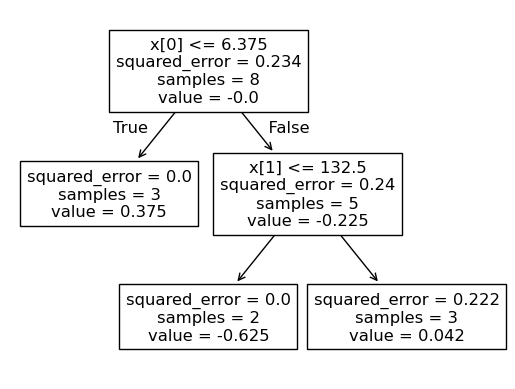

In [14]:
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(X, dataset['ri 1'].values)
plot_tree(dt1)

In [15]:
dataset['leaf node'] = dt1.apply(X)

In [16]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


Added a column that which node have how much value

How to calculate the node value

∑residual / ∑[previous pred * (1 - preivious pred)]

so example for leaf node 3:

-0.625 - 0.625 / 0.625 (1 - 0.625) + 0.625 (1 - 0.625)

In [21]:
node_value_mapping = {
    1: 1.6,
    3: -2.66,
    4: 0.18
}
dataset['leaf node value'] = dataset['leaf node'].map(node_value_mapping)

In [22]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node,leaf node value,pred2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.66,-0.114174
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,0.885826
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,0.885826
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,0.885826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.18,0.552826
5,9.13,148,1,0.510826,0.625,0.375,4,0.18,0.552826
6,7.17,147,1,0.510826,0.625,0.375,4,0.18,0.552826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.66,-0.114174


In [23]:
dataset['pred2'] = dataset['f0(x)'] + dataset['leaf node value']

In [24]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node,leaf node value,pred2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.66,-2.149174
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.18,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.18,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.18,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.66,-2.149174


In [37]:
dataset = dataset.drop('ri 2', axis = 1)

1 / 1 + exp^-(pred2)

In [38]:
dataset['pred 2 prob'] = 1 / (1 + (np.exp(-(dataset['pred2']))))

In [39]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node,leaf node value,pred2,pred 2 prob
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.18,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408


In [40]:
dataset['ri 2'] = dataset['Placement'] - dataset['pred 2 prob']

In [41]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node,leaf node value,pred2,pred 2 prob,ri 2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408,-0.104408
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.18,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408,-0.104408


In [52]:
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, dataset['ri 2'].values)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 6.995\nsquared_error = 0.09\nsamples = 8\nvalue = 0.015'),
 Text(0.25, 0.5, 'x[1] <= 136.5\nsquared_error = 0.09\nsamples = 5\nvalue = -0.089'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.008\nsamples = 4\nvalue = 0.055'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.666'),
 Text(0.75, 0.5, 'x[1] <= 109.5\nsquared_error = 0.043\nsamples = 3\nvalue = 0.188'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.104'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 0.334')]

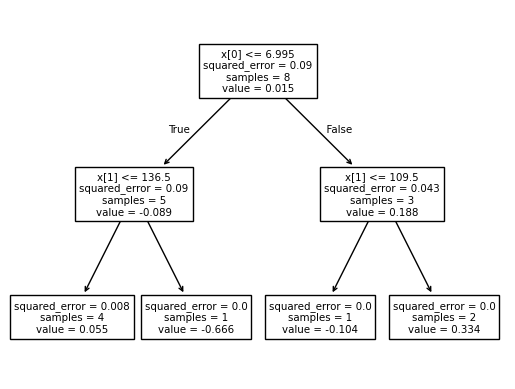

In [53]:
plot_tree(dt2)

In [54]:
dataset['leaf node 2'] = dt2.apply(X)

In [55]:
dataset

,CGPA,IQ,Placement,f0(x),pred1,ri 1,leaf node,leaf node value,pred2,pred 2 prob,ri 2,leaf node 2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408,-0.104408,2
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049,2
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049,2
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951,0.108049,2
4,6.39,148,0,0.510826,0.625,-0.625,4,0.18,0.690826,0.666151,-0.666151,3
5,9.13,148,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151,0.333849,6
6,7.17,147,1,0.510826,0.625,0.375,4,0.18,0.690826,0.666151,0.333849,6
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.66,-2.149174,0.104408,-0.104408,5
